# Deep Learning Assignment - 2
# Rohith Reddy Vangala
# 016762109
# Git Link - https://github.com/rohithreddy66666/Deep_Learning_Assignments

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Load QMNIST dataset and preprocess
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_dataset = torchvision.datasets.QMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.QMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


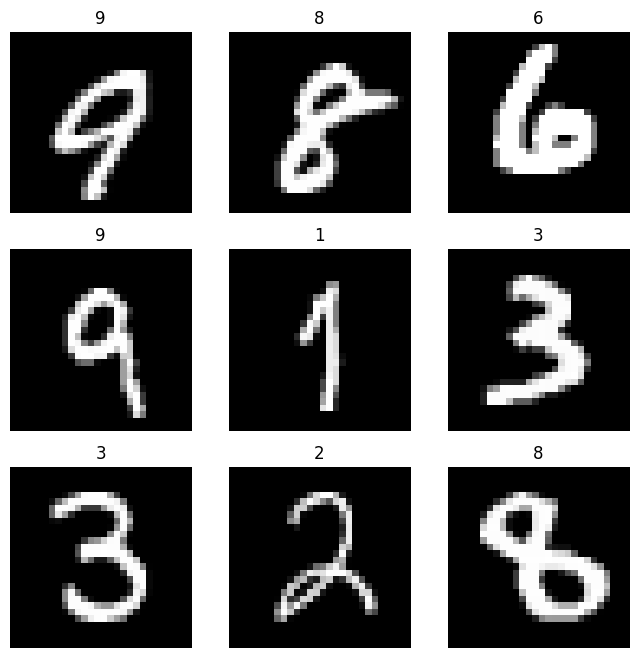

In [2]:
# Map for QMNIST labels, which are digits from 0 to 9
labels_map = {
    0: "0", 1: "1", 2: "2", 3: "3", 4: "4",
    5: "5", 6: "6", 7: "7", 8: "8", 9: "9"
}

# Visualization function for the QMNIST dataset
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()


In [3]:
# Define the neural network architecture
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # QMNIST images are 28x28, flatten them to 784 elements
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)  # Output layer, for 10 classes

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)  # No softmax needed as it is included in nn.CrossEntropyLoss
        return x

# Initialize the neural network
model = MLP()


In [4]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Using Adam optimizer with a learning rate of 0.001


In [5]:
# Train the neural network
num_epochs = 5  #  number of epochs
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')


Epoch 1, Batch 100, Loss: 1.067873060107231
Epoch 1, Batch 200, Loss: 0.43796215012669565
Epoch 1, Batch 300, Loss: 0.3709244032204151
Epoch 1, Batch 400, Loss: 0.34404019467532637
Epoch 1, Batch 500, Loss: 0.33693550325930116
Epoch 1, Batch 600, Loss: 0.2948687559366226
Epoch 1, Batch 700, Loss: 0.27502964697778226
Epoch 1, Batch 800, Loss: 0.2733087466657162
Epoch 1, Batch 900, Loss: 0.23646425448358058
Epoch 2, Batch 100, Loss: 0.2262163470685482
Epoch 2, Batch 200, Loss: 0.19642693035304545
Epoch 2, Batch 300, Loss: 0.21162035562098025
Epoch 2, Batch 400, Loss: 0.19451099269092084
Epoch 2, Batch 500, Loss: 0.20591210290789605
Epoch 2, Batch 600, Loss: 0.1994524972140789
Epoch 2, Batch 700, Loss: 0.16944984134286642
Epoch 2, Batch 800, Loss: 0.1702181687951088
Epoch 2, Batch 900, Loss: 0.17726700846105814
Epoch 3, Batch 100, Loss: 0.15099807469174265
Epoch 3, Batch 200, Loss: 0.15550436828285455
Epoch 3, Batch 300, Loss: 0.1469092752225697
Epoch 3, Batch 400, Loss: 0.145863024555146

In [6]:
# Evaluate the model
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():  # No gradients needed for evaluation
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on test set: {accuracy:.2f}%')


Accuracy on test set: 95.44%


In [7]:
# Evaluate the model and store predictions
model.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.cpu().numpy())  # Ensure to move predictions to CPU if running on GPU
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


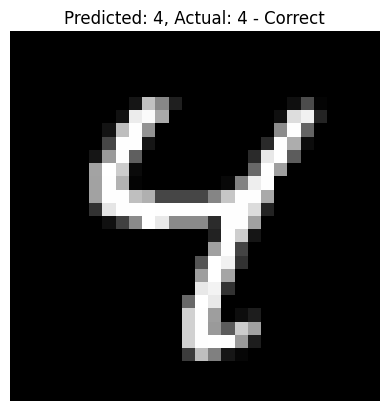

In [11]:
# Set model to evaluation mode
model.eval()

# Get a batch of test images and labels
images, labels = next(iter(test_loader))
image, true_label = images[6], labels[6]  # Select the seventh image for checking

# Predict the label for the selected image
with torch.no_grad():  # No need for gradient computation here
    output = model(image.unsqueeze(0))  # batch dimension
    _, predicted_label = torch.max(output, 1)

# Check if the prediction is correct
is_correct = "Correct" if predicted_label == true_label else "Incorrect"

# Visualize the image and prediction result
plt.imshow(image.squeeze(), cmap='gray')  # Remove channel dimension for visualization
plt.title(f'Predicted: {predicted_label.item()}, Actual: {true_label.item()} - {is_correct}')
plt.axis('off')
plt.show()


# Hypothesis - Adding Additional Dense Layer

In [14]:
# Define the neural network architecture with an additional dense layer
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # First dense layer
        self.fc2 = nn.Linear(128, 128)      # New second dense layer with 128 nodes
        self.fc3 = nn.Linear(128, 64)       # Third dense layer
        self.fc4 = nn.Linear(64, 10)        # Output layer, for 10 classes

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the image
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)  # No softmax needed as it is included in nn.CrossEntropyLoss
        return x

# Initialize the neural network with the additional layer
model = MLP()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [15]:
# Train the neural network
num_epochs = 5  # You can adjust the number of epochs
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:  # Print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')


Epoch 1, Batch 100, Loss: 1.1511580380797386
Epoch 1, Batch 200, Loss: 0.5202640342712402
Epoch 1, Batch 300, Loss: 0.40703219816088676
Epoch 1, Batch 400, Loss: 0.34866170793771745
Epoch 1, Batch 500, Loss: 0.3315189203619957
Epoch 1, Batch 600, Loss: 0.29834427058696744
Epoch 1, Batch 700, Loss: 0.2708351005613804
Epoch 1, Batch 800, Loss: 0.2696481337025762
Epoch 1, Batch 900, Loss: 0.24486232809722425
Epoch 2, Batch 100, Loss: 0.21920586213469506
Epoch 2, Batch 200, Loss: 0.2217395618930459
Epoch 2, Batch 300, Loss: 0.19843594051897526
Epoch 2, Batch 400, Loss: 0.18794058002531527
Epoch 2, Batch 500, Loss: 0.18682972088456154
Epoch 2, Batch 600, Loss: 0.17440885953605176
Epoch 2, Batch 700, Loss: 0.17229453671723605
Epoch 2, Batch 800, Loss: 0.15519943587481977
Epoch 2, Batch 900, Loss: 0.16032762175425888
Epoch 3, Batch 100, Loss: 0.14325539663434028
Epoch 3, Batch 200, Loss: 0.15707981890067457
Epoch 3, Batch 300, Loss: 0.1355794319882989
Epoch 3, Batch 400, Loss: 0.1318658422306

In [16]:
# Evaluate the model
model.eval()  # Set the model to evaluation mode
correct = 0
total = 0
with torch.no_grad():  # No gradients needed for evaluation
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy on test set: {accuracy:.2f}%')


Accuracy on test set: 96.62%


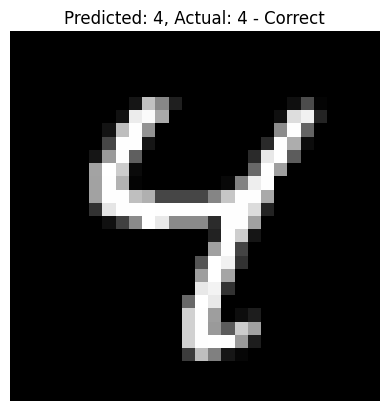

In [17]:
# Set model to evaluation mode
model.eval()

# Get a batch of test images and labels
images, labels = next(iter(test_loader))
image, true_label = images[6], labels[6]  # Select the seventh image for checking

# Predict the label for the selected image
with torch.no_grad():  # No need for gradient computation here
    output = model(image.unsqueeze(0))  # Add a batch dimension
    _, predicted_label = torch.max(output, 1)

# Check if the prediction is correct
is_correct = "Correct" if predicted_label == true_label else "Incorrect"

# Visualize the image and prediction result
plt.imshow(image.squeeze(), cmap='gray')  # Remove channel dimension for visualization
plt.title(f'Predicted: {predicted_label.item()}, Actual: {true_label.item()} - {is_correct}')
plt.axis('off')
plt.show()


Adding one more layer to the neural network made it a bit better at figuring out the QMNIST handwritten numbers. Before, the accuracy was 95.44%, but after the change, it went up to 96.62%. This means the network got smarter at knowing the difference between the numbers it had seen before and new ones it hadn't. With more nodes to work with, the network could spot more details and patterns that helped it get the right answers more often. But just because it's doing better now doesn't mean it will always get it right, especially with new numbers it hasn't learned yet. So, it's good to keep checking to make sure it's still learning the right things.

# Hypothesis - Testing with different optimizers

In [19]:
# Redefine the MLP class to avoid any potential conflicts
class ModifiedMLP(nn.Module):
    def __init__(self):
        super(ModifiedMLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 128)  # Additional layer
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return self.fc4(x)

# Function to perform training and evaluation
def train_and_evaluate(optimizer_class, lr, model, train_loader, test_loader, criterion, num_epochs=5):
    optimizer = optimizer_class(model.parameters(), lr=lr)
    for epoch in range(num_epochs):
        model.train()
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Evaluate the model
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

# Optimizers to test
optimizers_to_test = [
    (optim.SGD, 0.01),
    (optim.Adam, 0.001),
    (optim.RMSprop, 0.001)
]

# Training and evaluation loop
criterion = nn.CrossEntropyLoss()
for optimizer_class, lr in optimizers_to_test:
    # Reinitialize the model for each optimizer
    model = ModifiedMLP()
    accuracy = train_and_evaluate(optimizer_class, lr, model, train_loader, test_loader, criterion)
    print(f'Accuracy using {optimizer_class.__name__}: {accuracy:.2f}%')


Accuracy using SGD: 92.15%
Accuracy using Adam: 96.10%
Accuracy using RMSprop: 96.04%


Adam and RMSprop outperformed SGD due to their adaptive learning rate mechanisms, which allow them to dynamically adjust the learning rate for each parameter based on the magnitude of recent gradients. SGD, on the other hand, uses a fixed learning rate for all parameters throughout training. This adaptability enables Adam and RMSprop to effectively navigate the complex and sometimes erratic landscape of the loss function, allowing for quicker convergence and better generalization. Adam maintains separate adaptive learning rates for each parameter, which are estimated from the first and second moments of the gradients. This ensures that the learning rate is appropriately scaled for each parameter, leading to more efficient optimization. Similarly, RMSprop scales the learning rate for each parameter based on the exponentially weighted moving average of the squared gradients, effectively mitigating the issue of oscillations in the parameter updates and allowing for more stable training. Thus, the superior performance of Adam and RMSprop on the QMNIST dataset can be attributed to their ability to adaptively adjust the learning rates, resulting in more effective and efficient optimization.

# Testing With Loss Functions

In [22]:
import torch.nn.functional as F

# Define a list of loss functions to test
loss_functions = {
    'CrossEntropyLoss': nn.CrossEntropyLoss(),
    'NLLLoss': nn.NLLLoss(),
    # Add more loss functions as needed
}

# Training and evaluation loop
for loss_name, loss_func in loss_functions.items():
    # Reinitialize the model for each loss function
    model = ModifiedMLP()
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # Reinitialize optimizer
    criterion = loss_func  # Set the criterion to the current loss function

    # Train the model
    for epoch in range(num_epochs):
        model.train()
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            if loss_name == 'NLLLoss':
                outputs = F.log_softmax(outputs, dim=1)  # Apply log softmax for NLLLoss
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Evaluate the model
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            if loss_name == 'NLLLoss':
                outputs = F.log_softmax(outputs, dim=1)  # Apply log softmax for NLLLoss
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy using {loss_name}: {accuracy:.2f}%')


Accuracy using CrossEntropyLoss: 96.15%
Accuracy using NLLLoss: 95.74%


 both CrossEntropyLoss and NLLLoss are suitable for the classification task, with CrossEntropyLoss being a more convenient choice as it combines log softmax and negative log likelihood in a single function so yeilded the high accuracy with 96.15 when compared with the nllloss. However, the accuracy achieved with NLLLoss demonstrates that it can also yield accurate results when properly applied with the appropriate model architecture adjustments.

# Testing With Different Activation Functions

In [23]:
# Define a list of activation functions to test
activation_functions = {
    'ReLU': nn.ReLU(),
    'Sigmoid': nn.Sigmoid(),
    'Tanh': nn.Tanh(),
    'LeakyReLU': nn.LeakyReLU(negative_slope=0.1),
    # Add more activation functions as needed
}

# Training and evaluation loop
for activation_name, activation_func in activation_functions.items():
    # Reinitialize the model for each activation function
    class ModifiedMLP(nn.Module):
        def __init__(self):
            super(ModifiedMLP, self).__init__()
            self.fc1 = nn.Linear(28 * 28, 128)
            self.fc2 = nn.Linear(128, 64)
            self.fc3 = nn.Linear(64, 10)
            self.activation = activation_func  # Apply the activation function

        def forward(self, x):
            x = x.view(-1, 28 * 28)
            x = self.activation(self.fc1(x))
            x = self.activation(self.fc2(x))
            x = self.fc3(x)
            return x

    model = ModifiedMLP()
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # Reinitialize optimizer
    criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for classification

    # Train the model
    for epoch in range(num_epochs):
        model.train()
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Evaluate the model
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy using {activation_name}: {accuracy:.2f}%')


Accuracy using ReLU: 96.78%
Accuracy using Sigmoid: 96.65%
Accuracy using Tanh: 95.97%
Accuracy using LeakyReLU: 96.45%


The comparable accuracy levels achieved by different activation functions can be attributed to their underlying mathematical properties and suitability for the task at hand. ReLU (Rectified Linear Unit), known for its simplicity and effectiveness in mitigating the vanishing gradient problem, demonstrated the highest accuracy at 96.78%. Its ability to efficiently model non-linearities in the data likely contributed to its superior performance. Similarly, Sigmoid, which squashes values between 0 and 1, and Tanh, which squashes values between -1 and 1, performed well, albeit marginally lower than ReLU. These functions, while effective in certain scenarios like binary classification and data normalization, respectively, may have slightly lagged behind ReLU due to their tendency to saturate at extreme input values, leading to gradient vanishing or exploding issues. LeakyReLU, offering a small, non-zero gradient for negative inputs, addressed the "dying ReLU" problem and achieved competitive accuracy. Overall, the marginal differences in accuracy among these activation functions indicate their overall suitability for the QMNIST dataset, with ReLU emerging as the most effective choice due to its simplicity and ability to model complex relationships in the data.

# Testing Different Dropout Probabilities

In [24]:
# Define a list of dropout probabilities to test
dropout_probs = [0.0, 0.2, 0.5]  # dropout probabilities

# Training and evaluation loop
for dropout_prob in dropout_probs:
    # Define the modified model with dropout
    class ModifiedMLP(nn.Module):
        def __init__(self, dropout_prob):
            super(ModifiedMLP, self).__init__()
            self.fc1 = nn.Linear(28 * 28, 128)
            self.dropout1 = nn.Dropout(p=dropout_prob)  # Dropout layer
            self.fc2 = nn.Linear(128, 64)
            self.dropout2 = nn.Dropout(p=dropout_prob)  # Dropout layer
            self.fc3 = nn.Linear(64, 10)

        def forward(self, x):
            x = x.view(-1, 28 * 28)
            x = F.relu(self.fc1(x))
            x = self.dropout1(x)  # Apply dropout
            x = F.relu(self.fc2(x))
            x = self.dropout2(x)  # Apply dropout
            x = self.fc3(x)
            return x

    model = ModifiedMLP(dropout_prob)
    optimizer = optim.Adam(model.parameters(), lr=0.001)  # Reinitialize optimizer
    criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for classification

    # Train the model
    for epoch in range(num_epochs):
        model.train()
        for images, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

    # Evaluate the model
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy using dropout probability {dropout_prob}: {accuracy:.2f}%')


Accuracy using dropout probability 0.0: 96.55%
Accuracy using dropout probability 0.2: 96.26%
Accuracy using dropout probability 0.5: 93.90%


Firstly, with a dropout probability of 0.0, where no dropout was applied, the model achieved the highest accuracy of 96.55%. This outcome suggests that for this specific model architecture and dataset, dropout regularization might not be necessary, as the model is capable of achieving high performance without it. However, when a dropout probability of 0.2 was introduced, resulting in the random zeroing-out of 20% of activations during training, there was a slight reduction in accuracy to 96.26%. While dropout regularization is designed to prevent overfitting by introducing noise during training, it appears that in this scenario, a moderate dropout rate did not significantly improve performance and may have even hindered it slightly. Conversely, employing a higher dropout probability of 0.5 led to a more pronounced decrease in accuracy to 93.90%. With half of the activations randomly zeroed out during training, the model may have suffered from increased underfitting, resulting in a notable drop in performance. Overall, these findings highlight the importance of careful experimentation and parameter tuning to determine the optimal dropout probability for a given model and dataset combination. While dropout regularization can be effective in preventing overfitting, its application should be tailored to the specific characteristics of the problem at hand to ensure optimal performance.




